In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
from dtw import dtw, dtw_improved, dtw_ln, accelerated_dtw
from testing import TestFactory
from models import Autoregression
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial import distance

In [3]:
tests = TestFactory(random_state=42)
X = tests.set_sample(10)

In [4]:
ar_models = []
window_size = 10

for series in X:
    ar = Autoregression(series.loc[:, :"ECoG_ch3"], window_size)
    ar.fit(10)
    ar_models.append(ar.coeffecients())

Loss: 30704.188
Loss: 4420.158
Loss: 51556.441
Loss: 4157.871
Loss: 49695.281
Loss: 7369.300
Loss: 53411.914
Loss: 4139.916
Loss: 39573.094
Loss: 2410.076
Loss: 36386.363
Loss: 2864.023
Loss: 140132.656
Loss: 3573.972
Loss: 62015.719
Loss: 3531.708
Loss: 29274.070
Loss: 3004.307
Loss: 45064.062
Loss: 4411.804


In [5]:
coeffs = []
for series in ar_models:
    coeff = [np.array(np.concatenate([x.detach().numpy() for x in chanel], axis=0)) for chanel in series]
    coeffs.append(np.concatenate(coeff, axis=0))
coeffs = np.array(coeffs)

In [14]:
Z = linkage(coeffs, metric=distance.euclidean)

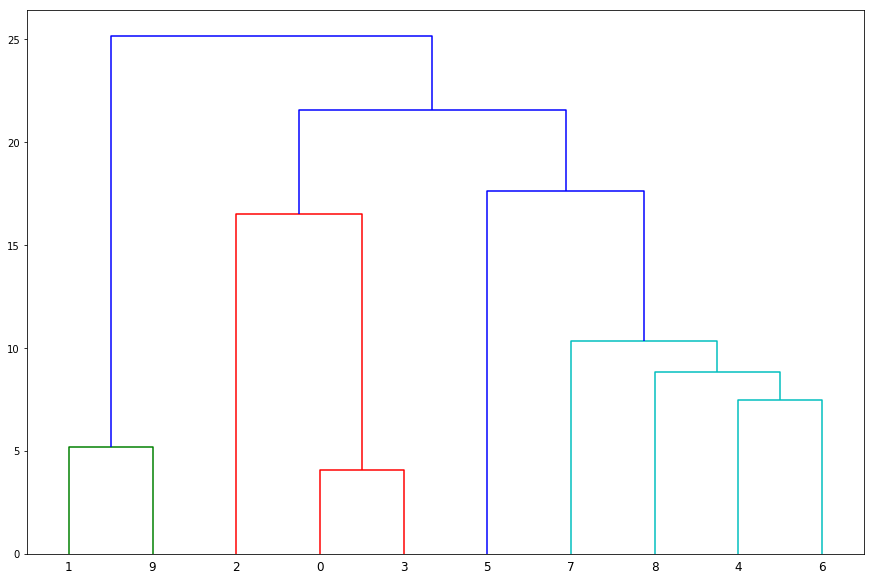

In [15]:
fig = plt.figure(figsize=(15, 10))
dn = dendrogram(Z)

In [16]:
cluster_num = 3
clusters_labels = fcluster(Z, cluster_num, criterion='maxclust')

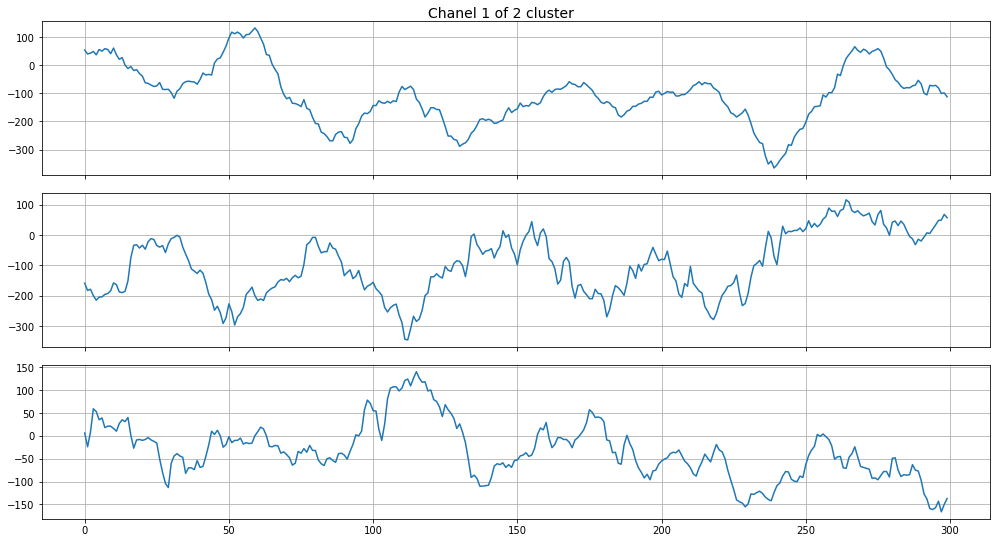

In [17]:
tests.show_clustered(Z, clusters_labels, label=2, ch=1)